<a href="https://colab.research.google.com/github/kp20409/CE888/blob/main/LAB3/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv", delimiter=";")

print('nColumns: ',len(df.columns))

df[["education"]] = df[["education"]].apply(LabelEncoder().fit_transform)
df[["month"]] = df[["month"]].apply(LabelEncoder().fit_transform)
df[["day_of_week"]] = df[["day_of_week"]].apply(LabelEncoder().fit_transform)
df[["poutcome"]] = df[["poutcome"]].apply(LabelEncoder().fit_transform)

df[["y"]] = df[["y"]].apply(LabelEncoder().fit_transform)

cat_features = ["job", "marital", "default", "housing", "loan", "contact"]
df = pd.get_dummies(df, columns=cat_features)
df = df.drop(['duration'], axis = 1)
df['pdays'].replace(999, 0, inplace=True)


before_drop = df.shape[0]

df = df.dropna()
after_drop = df.shape[0]

print('Missing values: ', before_drop-after_drop)

df.head()

nColumns:  21
Missing values:  0


,age,education,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone
0,56,0,6,1,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
1,57,3,6,1,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1
2,37,3,6,1,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1
3,40,1,6,1,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
4,56,3,6,1,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1


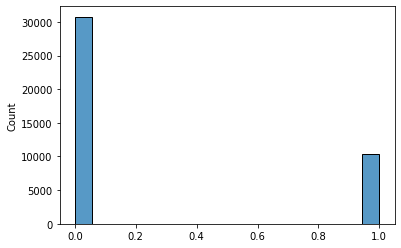

In [6]:
#plotting imbalance

y = df.values.T[14]
sns_plot = sns.histplot(y, kde=False)

In [7]:
nRows = df.shape[0]

trueLabels = df[df["y"] == 1]

imbalance = (trueLabels.shape[0]/nRows)*100

print('Imbalance: '+str(round(imbalance,2))+'%')

Imbalance: 11.27%


In [24]:
y = df[["y"]].values.T[0]
X = df.drop(['y'], axis=1)

features = X.columns.values

X = df.drop(['y'], axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

print('Training imbalance: ', round(np.count_nonzero(y_train == 0)/len(y_train), 3)*100, '%')
print('Test imbalance: ', round(np.count_nonzero(y_test == 0)/len(y_test), 3)*100, '%')

Training imbalance:  88.8 %
Test imbalance:  88.5 %


In [30]:
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=60)
scores = cross_val_score(rf_clf, X_train, y_train, cv=10, scoring='f1')  # cross-validation
print('RandomForestClassifier score: \n', scores.mean())

RandomForestClassifier score: 
 0.3484832741947587


In [23]:
dummy_clf = DummyClassifier(strategy='stratified')
scores = cross_val_score(dummy_clf, X_train, y_train, cv=10, scoring='f1')  # cross-validation
print('DummyClassifier score: \n', scores.mean())

DummyClassifier score: 
 0.10962481198118605


In [13]:
parameters = {'n_estimators':[100,500,1000], 'max_depth':[4,6,8]}

from sklearn.model_selection import GridSearchCV

grid_RFC = GridSearchCV(estimator=clf, param_grid = parameters, cv = 10, n_jobs=-1)
grid_RFC.fit(X_train, y_train)

print(" Results from Grid Search " )
print("\nBest estimator across searched params:\n",grid_RFC.best_estimator_)
print("\nBest score across searched params:\n",grid_RFC.best_score_)
print("\nBest parameters across searched params:\n",grid_RFC.best_params_)

 Results from Grid Search 

Best estimator across searched params:
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Best score across searched params:
 0.9008801213960547

Best parameters across searched params:
 {'max_depth': 8, 'n_estimators': 1000}


In [14]:
clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report
cf=classification_report(y_test,y_pred)
print(cf)


              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7288
           1       0.64      0.21      0.32       950

    accuracy                           0.90      8238
   macro avg       0.77      0.60      0.63      8238
weighted avg       0.87      0.90      0.87      8238



Feature ranking:
1. nr.employed (0.180136)
2. euribor3m (0.158356)
3. pdays (0.096886)
4. poutcome (0.090437)
5. emp.var.rate (0.065934)
6. cons.conf.idx (0.054522)
7. cons.price.idx (0.054199)
8. age (0.052593)
9. month (0.035749)
10. previous (0.028899)
11. day_of_week (0.022123)
12. campaign (0.021873)
13. education (0.020390)
14. contact_telephone (0.013035)
15. contact_cellular (0.011200)
16. housing_no (0.005895)
17. housing_yes (0.005868)
18. marital_single (0.005476)
19. job_retired (0.005266)
20. job_admin. (0.005256)
21. job_student (0.005235)
22. loan_no (0.005153)
23. marital_married (0.005114)
24. loan_yes (0.004956)
25. job_blue-collar (0.004940)
26. default_unknown (0.004910)
27. default_no (0.004878)
28. job_technician (0.004487)
29. marital_divorced (0.003845)
30. job_management (0.003241)
31. job_services (0.003111)
32. job_self-employed (0.002678)
33. job_housemaid (0.002389)
34. housing_unknown (0.002296)
35. job_unemployed (0.002248)
36. loan_unknown (0.002119)
37.

(0.0, 0.3823184541380987)

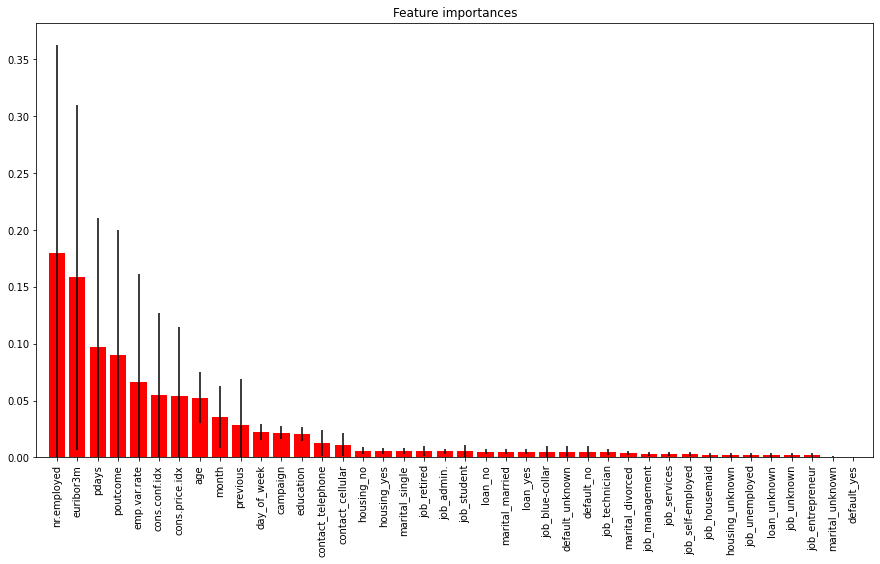

In [32]:
rf_clf.fit(X_train, y_train)
importances = rf_clf.feature_importances_

std = np.std([tree.feature_importances_ for tree in rf_clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X.shape[1]):
  print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices], rotation='vertical')
plt.xlim([-1, X.shape[1]])
fig.set_size_inches(15, 8)
axes = plt.gca()
axes.set_ylim([0, None])

In [19]:
scores = cross_val_score(clf, X_test, y_test, cv=10, scoring='accuracy')  # cross-validation
print(scores.mean())

0.894512882067737
